# **Project Name:** House Price Prediction using Linear Regression
#**TASK 01**
<br>**Description:**
Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
cd /content/drive/MyDrive/PP/TASK01PDG

/content/drive/MyDrive/PP/TASK01PDG


In [29]:
import pandas as pd

In [30]:
df=pd.read_csv("/content/drive/MyDrive/PP/TASK01PDG/House Prices.csv")

# **Studying Data**

In [31]:
df.head()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400.0,9373.0,2.0,0.0,0.0,...,7.0,2400.0,0.0,1991.0,0.0,98002.0,47.3262,-122.214,2060.0,7316.0
1,2,20150422T000000,300000.0,6,3.00,2400.0,9373.0,2.0,0.0,0.0,...,7.0,2400.0,0.0,1991.0,0.0,98002.0,47.3262,-122.214,2060.0,7316.0
2,3,20140508T000000,647500.0,4,1.75,2060.0,26036.0,1.0,0.0,0.0,...,8.0,1160.0,900.0,1947.0,0.0,98166.0,47.4444,-122.351,2590.0,21891.0
3,4,20140811T000000,400000.0,3,1.00,1460.0,43000.0,1.0,0.0,0.0,...,7.0,1460.0,0.0,1952.0,0.0,98166.0,47.4434,-122.347,2250.0,20023.0
4,5,20150401T000000,235000.0,3,1.00,1430.0,7599.0,1.5,0.0,0.0,...,6.0,1010.0,420.0,1930.0,0.0,98168.0,47.4783,-122.265,1290.0,10320.0


In [32]:
df.describe()

,ID,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
count,10147.000000,1.014700e+04,10147.000000,10147.000000,10146.000000,1.014600e+04,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000
mean,5074.000000,5.447467e+05,3.352321,2.114418,2085.293219,2.130911e+04,1.492756,0.007885,0.222354,3.420363,7.654248,1795.429233,289.863986,1970.862705,90.296964,98078.564755,47.558043,-122.216180,1985.202050,16974.849103
std,2929.330925,3.719381e+05,0.960354,0.791662,950.798617,5.846164e+04,0.545714,0.088450,0.750776,0.658130,1.210644,856.694145,442.378152,29.301905,414.854887,53.769721,0.137709,0.140575,686.600536,37852.969935
min,1.000000,7.500000e+04,0.000000,0.000000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,659.000000
25%,2537.500000,3.200000e+05,3.000000,1.500000,1400.000000,5.121250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.465725,-122.336000,1480.000000,5208.000000
50%,5074.000000,4.499000e+05,3.000000,2.250000,1900.000000,7.874000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98070.000000,47.566400,-122.225000,1830.000000,7803.000000
75%,7610.500000,6.500000e+05,4.000000,2.500000,2560.000000,1.203750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1996.000000,0.000000,98117.000000,47.674400,-122.126000,2360.000000,10785.250000
max,10147.000000,5.570000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10147 non-null  int64  
 1   Date           10147 non-null  object 
 2   Price          10147 non-null  float64
 3   Bedrooms       10147 non-null  int64  
 4   Bathrooms      10147 non-null  float64
 5   Sqft_living    10146 non-null  float64
 6   Sqft_lot       10146 non-null  float64
 7   Floors         10146 non-null  float64
 8   Waterfront     10146 non-null  float64
 9   View           10146 non-null  float64
 10  Condition      10146 non-null  float64
 11  Grade          10146 non-null  float64
 12  Sqft_above     10146 non-null  float64
 13  Sqft_basement  10146 non-null  float64
 14  Yr_built       10146 non-null  float64
 15  Yr_renovated   10146 non-null  float64
 16  zipcode        10146 non-null  float64
 17  Lat            10146 non-null  float64
 18  Long  

# **Defining X & Y**

In [34]:
df.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [35]:
y=df['Price']
X=df[[ 'Sqft_living','Bedrooms', 'Bathrooms']]


In [43]:
from sklearn.model_selection import train_test_split

# **Dividing data into Train-Test**

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [38]:
X.shape,X_train.shape,X_test.shape


((10147, 3), (7610, 3), (2537, 3))

In [39]:
y.shape,y_train.shape,y_test.shape

((10147,), (7610,), (2537,))

**Removing rows having NULLS**

In [46]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# **Training Model**

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred=model.predict(X_test)

In [50]:
# step8: evaluation
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
mean_absolute_percentage_error(y_test,y_pred)

0.35555954248017896

In [51]:
mean_squared_error(y_test,y_pred)

57102246405.82373

# **Predicting house price by giving parameters like bedrooms,bathrooms, & Square Footage.**

In [52]:
def predict_price(bedrooms, bathrooms, sqft_living):
  """
  Predicts the price of a house based on its square footage, number of bedrooms, and number of bathrooms.

  Args:
    bedrooms: The number of bedrooms in the house.
    bathrooms: The number of bathrooms in the house.
    sqft_living: The square footage of the house.

  Returns:
    The predicted price of the house.
  """
  # Create a DataFrame with the input values.
  input_data = pd.DataFrame({
      'Sqft_living': [sqft_living],
      'Bedrooms': [bedrooms],
      'Bathrooms': [bathrooms],

  })

  # Predict the price of the house using the model.
  predicted_price = model.predict(input_data)[0]

  # Return the predicted price.
  return predicted_price

# Example usage:

sqft_living=int(input("Enter Square footage: "))
bedrooms=int(input("Enter number of bedrooms: "))
bathrooms=int(input("Enter number of bathrooms: "))
predicted_price = predict_price(bedrooms, bathrooms, sqft_living)
print(f"Predicted price: {predicted_price}")


Enter Square footage: 2400
Enter number of bedrooms: 6
Enter number of bathrooms: 3
Predicted price: 523735.83300729224


# **Relation between Sq_ft & House Price accordingly**

<Axes: xlabel='Sqft_living', ylabel='Price'>

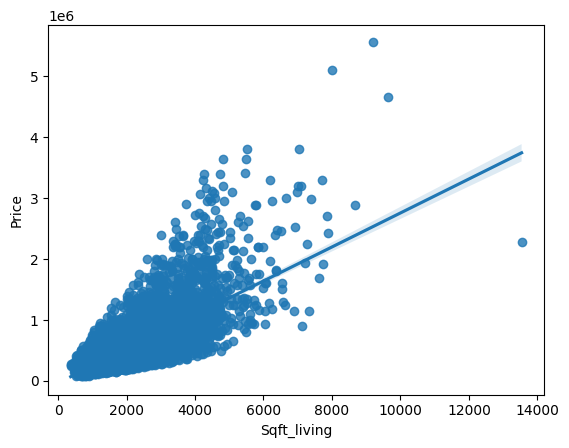

In [53]:
import seaborn as sns
sns.regplot(x='Sqft_living', y='Price' ,data = df,fit_reg=True)